## Mobile price classification

Classifing the price of mobile phone based on the features of mobile
- 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Dataset info : 
- battery_power
    * Total energy a battery can store in one time measured in mAh

- blue
    * Has bluetooth or not

- clock_speed
    * speed at which microprocessor executes instructions

- dual_sim
    * Has dual sim support or not

- fc
    * Front Camera mega pixels

- four_g
    * Has 4G or not

- int_memory
    * Internal Memory in Gigabytes

- m_dep
    * Mobile Depth in cm

- mobile_wt
    * Weight of mobile phone

- n_cores
    * Number of cores of processor

- pc
    * Primary Camera mega pixels

- px_height
    * Pixel Resolution Height

- px_width
    * Pixel Resolution Width

- ram
    * Random Access Memory in Mega Bytes

- sc_h
    * Screen Height of mobile in cm

- sc_w
    * Screen Width of mobile in cm

- talk_time
    * longest time that a single battery charge will last when you are

- three_g
    * Has 3G or not

- touch_screen
    * Has touch screen or not

- wifi
    * Has wifi or not

- price_range
    * This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

#### Importing Neccesary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
df=pd.read_csv('E:/ML projects/workspace/dataset/data.csv')

#### Dataset Overview

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [5]:
df.shape

(2000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### Checking for null values

In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Checking for duplicated values

In [11]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [15]:
#There is no categorical columns

#### Exploratory Data Analysis

In [16]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [17]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

<Axes: >

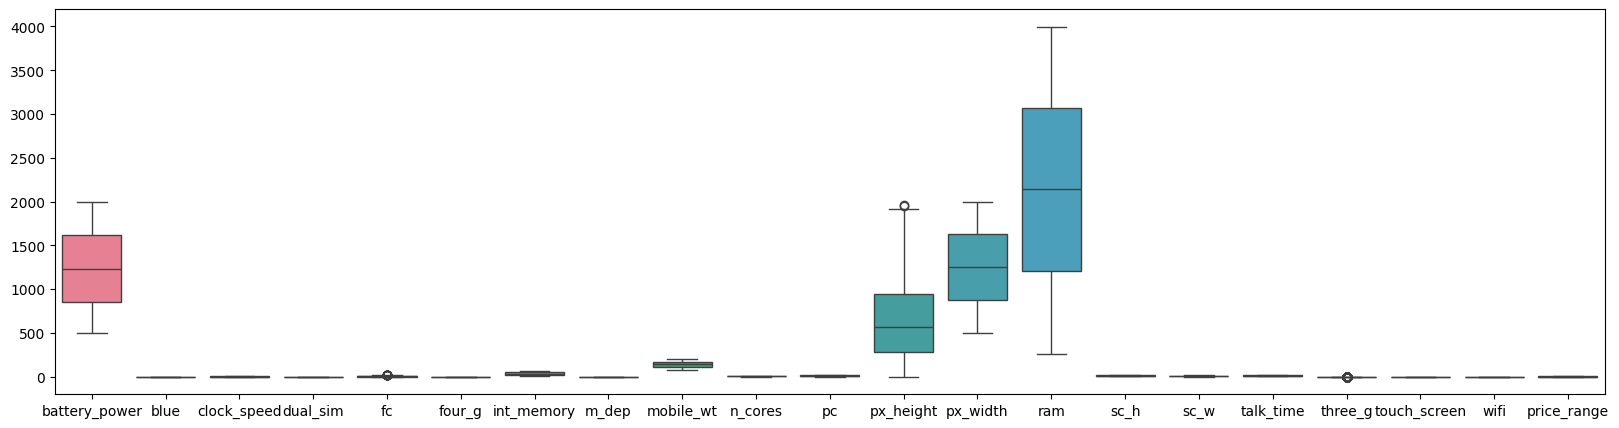

In [21]:
plt.figure(figsize=(20,5))
sns.boxplot(df)

In [22]:
# There is no outliers

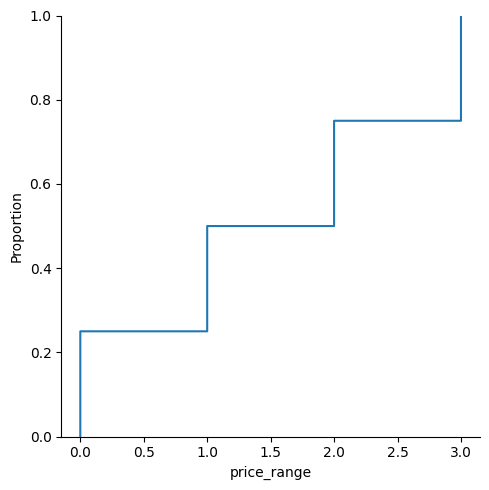

In [26]:
sns.displot(x='price_range',data=df,kind='ecdf')

<Axes: xlabel='ram', ylabel='int_memory'>

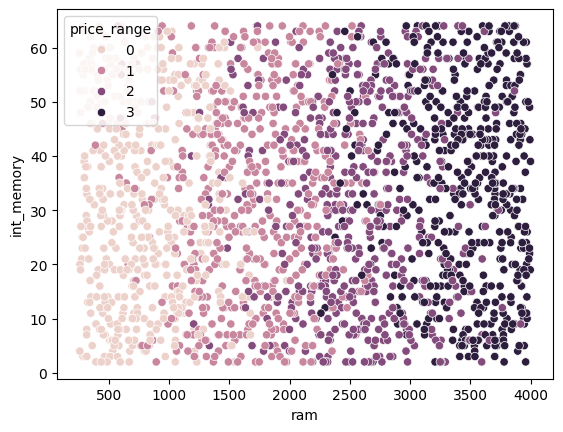

In [33]:
sns.scatterplot(y='int_memory',x='ram',data=df,hue='price_range')

In [34]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [35]:
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2


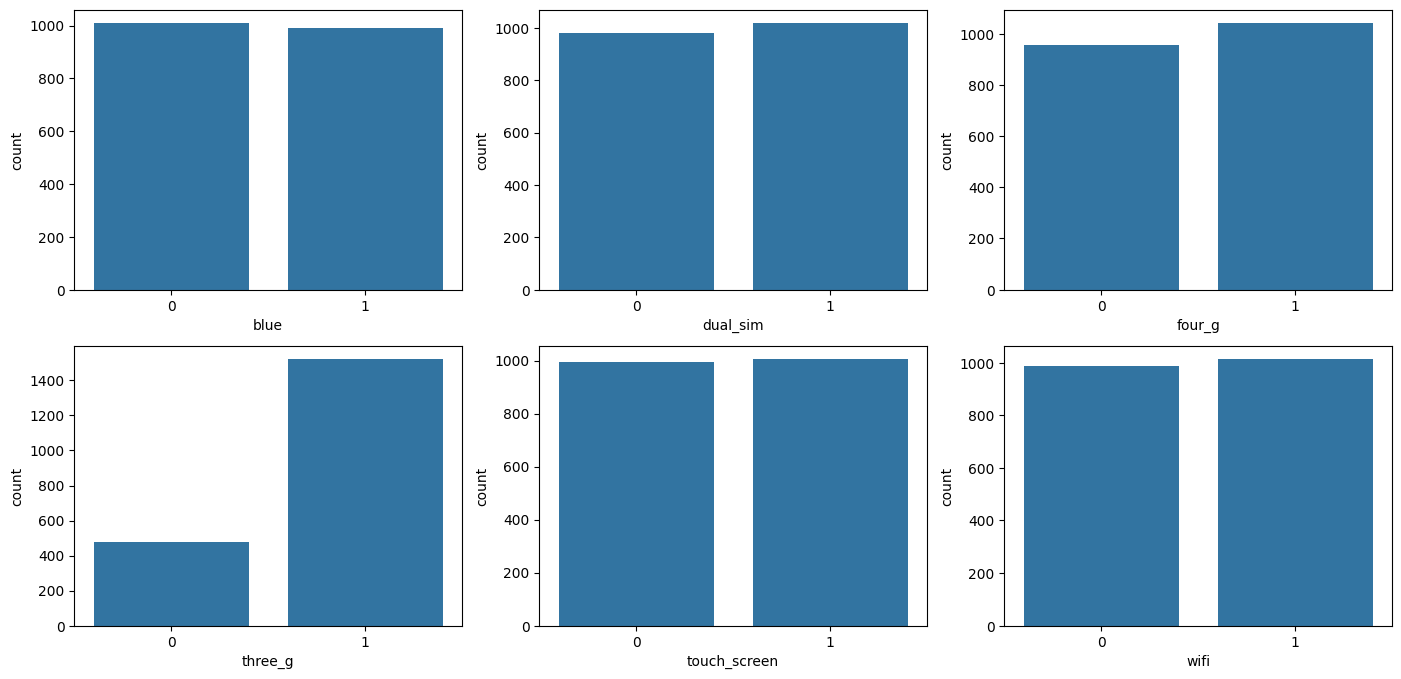

In [39]:
plt.figure(figsize=(17,8))
j=1
for i in ['blue','dual_sim','four_g','three_g','touch_screen','wifi']:
    plt.subplot(2,3,j)
    sns.countplot(x=i,data=df)
    j+=1

<Axes: >

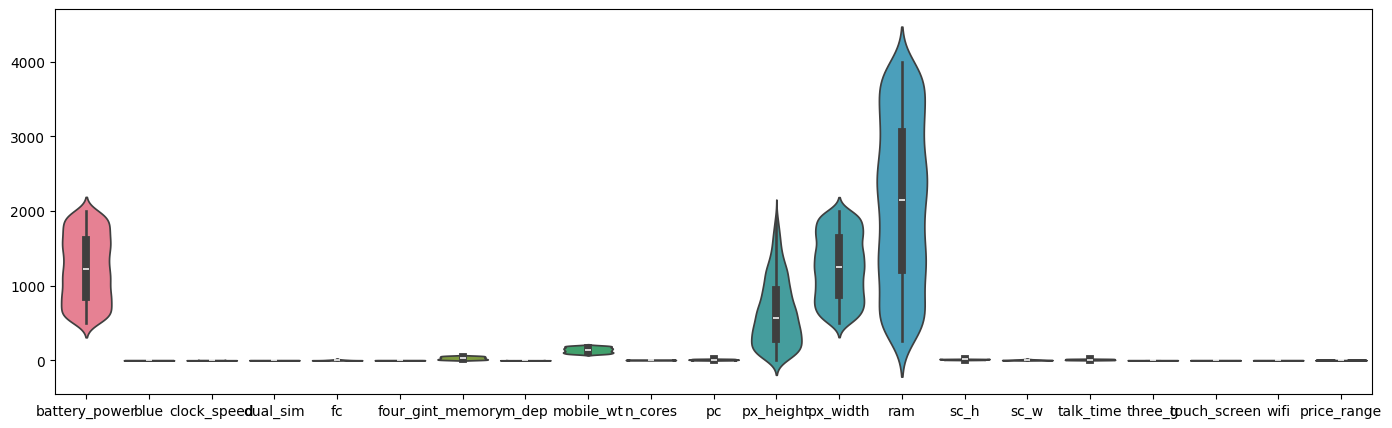

In [41]:
plt.figure(figsize=(17,5))
sns.violinplot(df)

<Axes: xlabel='n_cores', ylabel='count'>

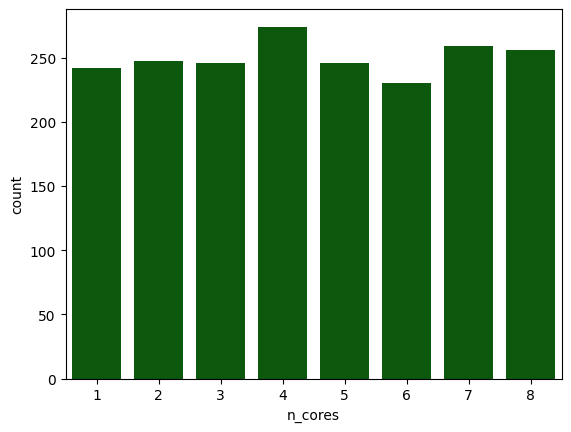

In [44]:
sns.countplot(x='n_cores',data=df,color='darkgreen')

#### Independent and dependent features

In [45]:
x=df.drop(['price_range'],axis=1)
y=df['price_range']

In [46]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [47]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

#### Splitting the data for training and testing

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [50]:
x_train.shape,x_test.shape

((1600, 20), (400, 20))

#### Standardization

In [52]:
scaler=StandardScaler()
scaler

StandardScaler()

In [53]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [54]:
x_train

array([[ 0.01437694, -1.00250313,  0.10859092, ..., -1.79179416,
        -0.9900495 ,  0.98757716],
       [-0.09870487,  0.99750312,  0.8537466 , ...,  0.55809982,
         1.0100505 ,  0.98757716],
       [-1.65018736,  0.99750312,  1.59890228, ...,  0.55809982,
        -0.9900495 , -1.01257911],
       ...,
       [ 1.62918524, -1.00250313, -1.25752783, ...,  0.55809982,
         1.0100505 ,  0.98757716],
       [ 0.71774582, -1.00250313, -0.51237215, ..., -1.79179416,
         1.0100505 , -1.01257911],
       [ 0.37171547, -1.00250313,  0.10859092, ...,  0.55809982,
         1.0100505 , -1.01257911]])

#### Model training and evaluation

#### Logistic Regression

In [57]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("accuracy_score : ",accuracy_score(y_test,y_pred))
print("classification report : \n",classification_report(y_test,y_pred))

accuracy_score :  0.965
classification report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.95      0.94        98
           2       0.96      0.96      0.96        94
           3       0.98      0.99      0.99       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.97       400



#### Xgboost

In [58]:
model=XGBRFClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("accuracy_score : ",accuracy_score(y_test,y_pred))
print("classification report : \n",classification_report(y_test,y_pred))

accuracy_score :  0.8875
classification report : 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       108
           1       0.84      0.87      0.85        98
           2       0.81      0.88      0.85        94
           3       0.94      0.90      0.92       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



#### Random Forest

In [59]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("accuracy_score : ",accuracy_score(y_test,y_pred))
print("classification report : \n",classification_report(y_test,y_pred))

accuracy_score :  0.89
classification report : 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.84      0.84      0.84        98
           2       0.81      0.85      0.83        94
           3       0.95      0.93      0.94       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

